In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.io
import matplotlib as mpl

mpl.rcParams['font.size']=14

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1 0.34481761448919146 0.4491017406769996
6 0.22560748955429882 0.5438190677541712
9 0.812075738338141 0.8830860412062039
16 0.6455491867992563 0.8082052950974861


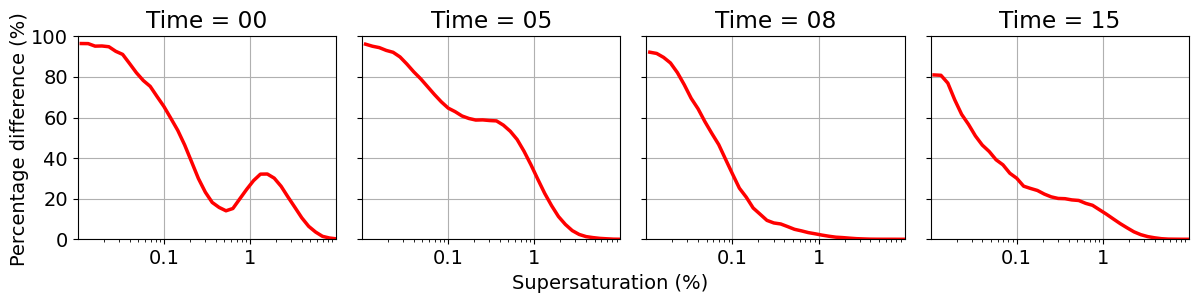

In [3]:
hour = [1, 6, 9, 16]

fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):
    
    time = "%02d"%hour[i]
    ncf = scipy.io.netcdf_file('/data/keeling/a/xx24/d/proj_film/partmc/scenarios/1_urban_plume/out/urban_plume_000000'+time+'_process.nc', mmap=False)

    sc_grid  = ncf.variables["sc"].data.copy()*100
    sc_dist = ncf.variables['sc_dist'].data.copy()
    sc_varying_sigma_dist = ncf.variables['sc_varying_sigma_dist'].data.copy()

    cdf_sc_dist = np.nancumsum(sc_dist)/np.nansum(sc_dist)
    cdf_sc_varying_sigma_dist = np.nancumsum(sc_varying_sigma_dist)/np.nansum(sc_varying_sigma_dist)

    pct_diff_cdf = 100.0 * np.abs(cdf_sc_varying_sigma_dist - cdf_sc_dist) / cdf_sc_varying_sigma_dist

    print(hour[i], cdf_sc_dist[18], cdf_sc_varying_sigma_dist[18])

    ax.set_ylim(0, 100)
    ax.set_xlim(1e-2,1e1)
    ax.set_xscale('log')
    ax.plot(sc_grid, pct_diff_cdf, lw=2.5, c='r')
    ax.set_title(f'Time = {int(time) - 1 :02d}', loc='center')
    ax.grid(True, which='major', axis='x')
    ax.grid(True, which='major', axis='y')
    ax.set_xticks([1e-1,1e0])
    ax.set_xticklabels(['0.1','1'])
    # ax.set_yticks([0.0, 0.5, 1.0])
    
    if i == 0:
       ax.legend(loc=2, frameon=False)
    
    ax.tick_params(axis='x') 
    ax.label_outer()

fig.text(0.5, 0, "Supersaturation (%)", ha='center')
fig.text(0, 0.5, "Percentage difference (%)", va='center', rotation='vertical')

plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig('/data/keeling/a/xx24/d/proj_film/percentage_diff.pdf', bbox_inches='tight',dpi=300)